#### https://archive.ics.uci.edu/dataset/539/divorce+predictors+data+set - link to the dataset

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


#### Dataset structure

In [2]:
file = 'divorce.csv'

df = pd.read_csv(file, delimiter=';')

print(df.head())

   Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr46  \
0     2     2     4     1     0     0     0     0     0      0  ...      2   
1     4     4     4     4     4     0     0     4     4      4  ...      2   
2     2     2     2     2     1     3     2     1     1      2  ...      3   
3     3     2     3     2     3     3     3     3     3      3  ...      2   
4     2     2     1     1     1     1     0     0     0      0  ...      2   

   Atr47  Atr48  Atr49  Atr50  Atr51  Atr52  Atr53  Atr54  Class  
0      1      3      3      3      2      3      2      1      1  
1      2      3      4      4      4      4      2      2      1  
2      2      3      1      1      1      2      2      2      1  
3      2      3      3      3      3      2      2      2      1  
4      1      2      3      2      2      2      1      0      1  

[5 rows x 55 columns]


#### This dataset consists of 170 records, each having 55 columns, where 54 shows answers to relationship related questions in scale 0 to 4, and 1 column show state of surveyed person (married or divorced)

In [3]:
#Class == isDivorced(0 == no, 1 == yes)
divorce_count = df['Class'].value_counts()
divorce_count.index = ['Happily Married', 'Divorced']

In [4]:
print(divorce_count)

Happily Married    86
Divorced           84
Name: count, dtype: int64


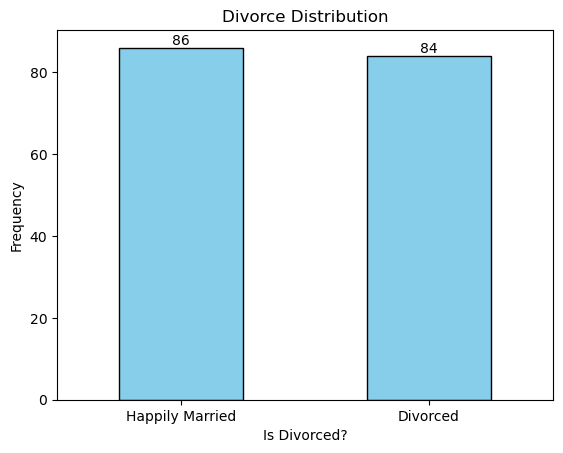

In [5]:
ax = divorce_count.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Divorce Distribution')
plt.xlabel('Is Divorced?')
plt.ylabel('Frequency')

plt.xticks(rotation = 0)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1,  
            str(int(i.get_height())),  
            ha='center', va='bottom')

plt.show()

#### Data can be tagged as categorical and numerical, but I think as there are no measurable differences between all answers (e.g. if someone answers 2 (so they do thing in question only sometimes, can have complete different meaning to someone else, who also answered 2), so I'll treat data as categorical!

In [6]:
df_divorced = df[df['Class'] == 1]
df_married = df[df['Class'] == 0]

df_divorced.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,84.000000,84.000000,84.000000,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,3.190476,2.869048,2.916667,2.72619,3.011905,1.130952,0.988095,2.809524,2.892857,2.773810,...,3.166667,3.321429,3.452381,3.511905,3.500000,3.357143,3.488095,3.321429,3.369048,1.0
std,0.752125,0.915460,0.747821,0.92295,0.975533,0.902203,1.069783,1.011693,0.878359,0.882919,...,1.095812,1.121109,0.718176,0.783782,0.814034,0.845154,0.871144,0.920460,1.095223,0.0
min,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0
25%,3.000000,2.000000,3.000000,2.00000,3.000000,0.000000,0.000000,2.000000,3.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.0
50%,3.000000,3.000000,3.000000,3.00000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0
75%,4.000000,4.000000,3.000000,3.00000,4.000000,2.000000,1.000000,3.250000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0
max,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0


In [7]:
df_married.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,0.395349,0.465116,0.639535,0.267442,0.104651,0.372093,0.011628,0.127907,0.05814,0.406977,...,1.953488,1.244186,2.046512,1.279070,1.383721,1.616279,1.569767,1.186047,0.686047,0.0
std,0.898090,0.762313,0.919243,0.803293,0.376644,0.736390,0.107833,0.399897,0.23538,0.675241,...,1.353922,1.273587,1.039309,1.204415,1.019442,0.972185,1.324348,1.183332,0.871262,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.0
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.00000,1.000000,...,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.0
max,4.000000,3.000000,4.000000,4.000000,2.000000,4.000000,1.000000,2.000000,1.00000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.0


#### Function that creates simple barplot that shows answers distribution across married and divorced couples

In [8]:
def question_barplot(atr, question, question_no):
    fig, axs = plt.subplots(1, 2, figsize=(10,8))

    all_categories = [0,1,2,3,4]
    
    df_married_atr = df_married[atr].value_counts().reindex(all_categories, fill_value=0)
    df_divorced_atr = df_divorced[atr].value_counts().reindex(all_categories, fill_value=0)
    
    answers_scale = ['Never','Rarely','Sometimes','Often','Always']
    
    df_married_atr.index = answers_scale
    df_divorced_atr.index = answers_scale
    
    df_married_atr.plot(kind='bar', ax=axs[0], color='skyblue')
    df_divorced_atr.plot(kind='bar', ax=axs[1], color='red')

    fig.text(0.5, -0.02, question_no + ': ' + question, ha='center', va='center', fontsize=14)
    
    axs[0].set_title('Married answers to ' + question_no)
    axs[1].set_title('Divorced answers to ' + question_no)
    
    axs[1].set_ylim(0, 70)
    
    plt.show()
    

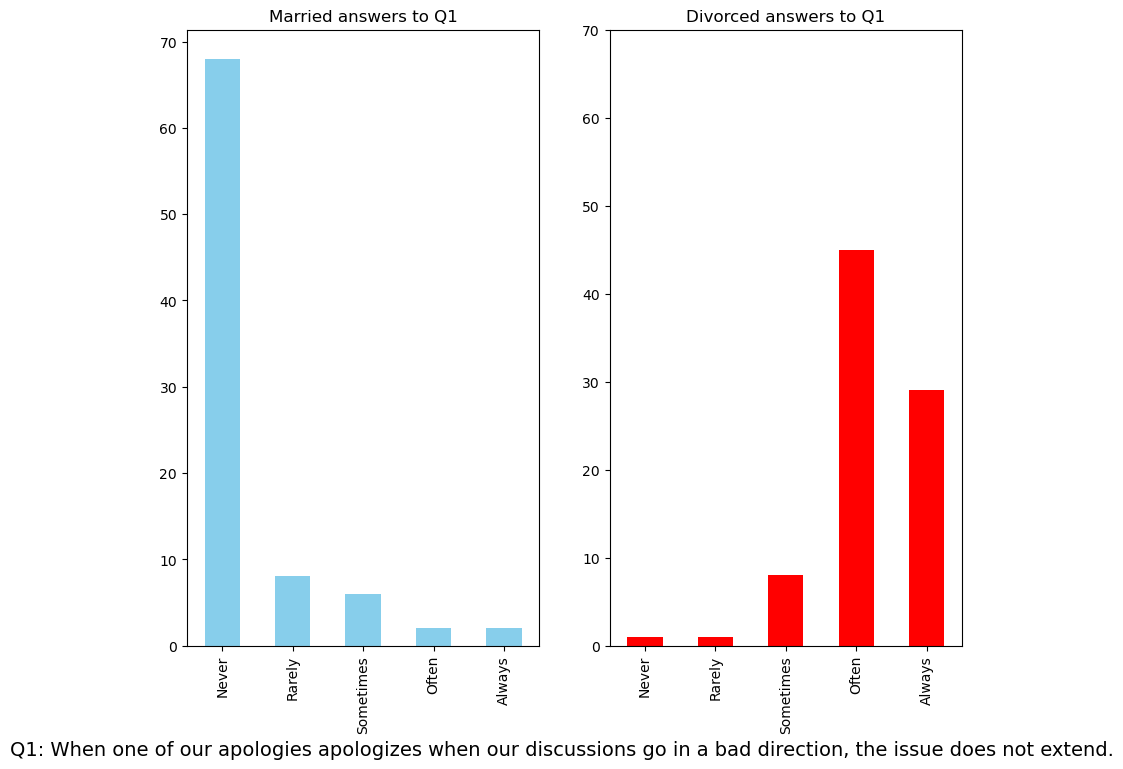

In [9]:
question_barplot('Atr1', 'When one of our apologies apologizes when our discussions go in a bad direction, the issue does not extend.', 'Q1')

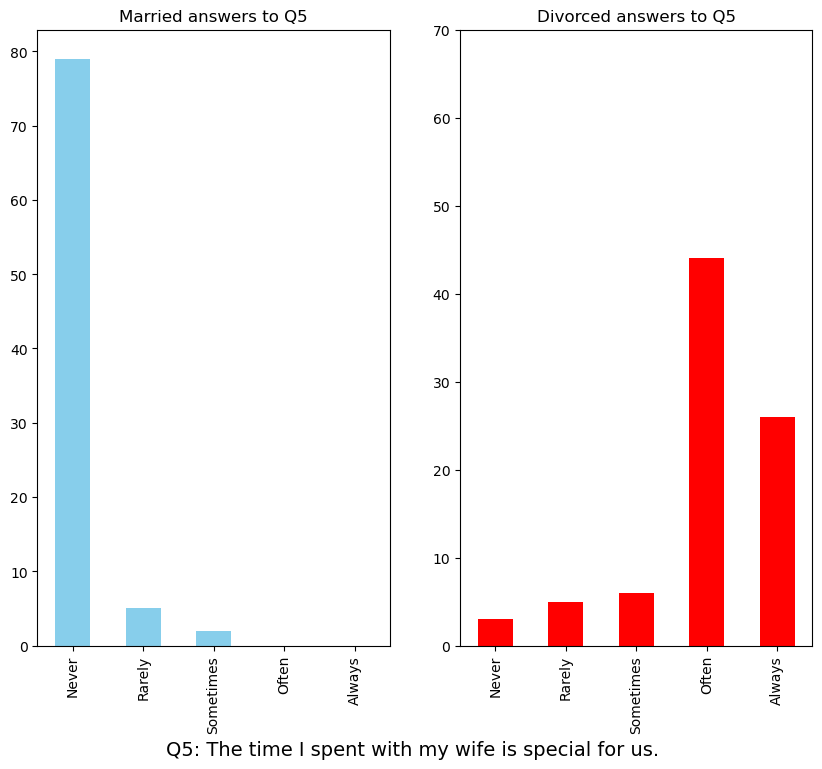

In [10]:
question_barplot('Atr5', 'The time I spent with my wife is special for us.', 'Q5')

#### "We are just starting a fight before I know what is going on” is the most important one in the input data in the ANN usage (Ibrahim M. Nasser, Predicting Whether a Couple is Going to Get Divorced or Not Using Artificial Neural Networks)

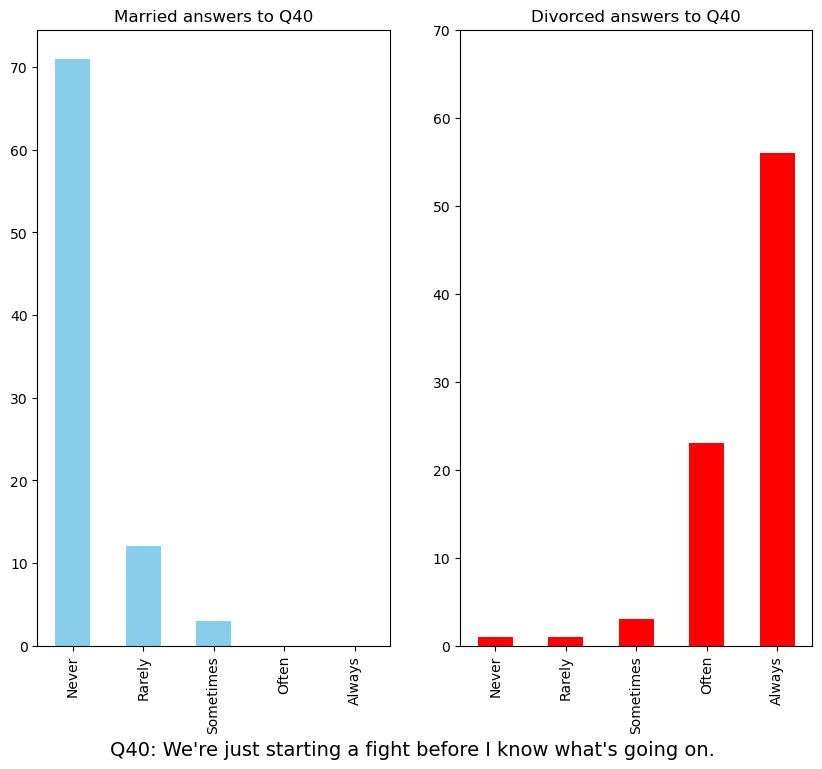

In [11]:
question_barplot('Atr40', 'We\'re just starting a fight before I know what\'s going on.', 'Q40')

#### For context, most of the questions in this dataset we can mark as positive (i.e. question relates to some positive behaviour in realtionship). Means below shows us something strange and interesting. People who're happily married less likely answer question that they always do things like "The time I spent with my wife is special for us.", than divorced.

In [12]:
mean_married = df_married.mean()
ss = mean_married.sort_values()
full_mean_married = mean_married.mean()
mean_divorced = df_divorced.mean()
ssd = mean_divorced.sort_values()
full_mean_divorced = mean_divorced.mean()

In [13]:
print(full_mean_divorced)

3.0093073593073596


In [14]:
print(full_mean_married)

0.5408033826638478


In [15]:
print(ss)

Class    0.000000
Atr7     0.011628
Atr36    0.034884
Atr9     0.058140
Atr22    0.069767
Atr20    0.069767
Atr23    0.081395
Atr28    0.081395
Atr18    0.093023
Atr29    0.093023
Atr35    0.104651
Atr5     0.104651
Atr8     0.127907
Atr19    0.139535
Atr27    0.151163
Atr21    0.151163
Atr16    0.162791
Atr17    0.174419
Atr26    0.197674
Atr30    0.197674
Atr11    0.197674
Atr40    0.209302
Atr15    0.232558
Atr4     0.267442
Atr24    0.267442
Atr14    0.290698
Atr33    0.290698
Atr25    0.337209
Atr38    0.348837
Atr6     0.372093
Atr1     0.395349
Atr12    0.395349
Atr10    0.406977
Atr2     0.465116
Atr41    0.476744
Atr44    0.534884
Atr34    0.558140
Atr39    0.569767
Atr13    0.604651
Atr37    0.627907
Atr3     0.639535
Atr54    0.686047
Atr32    0.732558
Atr31    0.837209
Atr42    1.011628
Atr53    1.186047
Atr47    1.244186
Atr49    1.279070
Atr50    1.383721
Atr52    1.569767
Atr51    1.616279
Atr45    1.651163
Atr46    1.953488
Atr43    1.953488
Atr48    2.046512
dtype: flo

In [16]:
print(ssd)

Atr7     0.988095
Class    1.000000
Atr6     1.130952
Atr22    2.452381
Atr28    2.559524
Atr21    2.654762
Atr27    2.678571
Atr4     2.726190
Atr10    2.773810
Atr23    2.773810
Atr24    2.785714
Atr8     2.809524
Atr26    2.809524
Atr16    2.821429
Atr30    2.821429
Atr2     2.869048
Atr14    2.880952
Atr20    2.880952
Atr9     2.892857
Atr3     2.916667
Atr29    2.928571
Atr12    2.940476
Atr15    2.940476
Atr25    2.952381
Atr18    2.976190
Atr5     3.011905
Atr13    3.095238
Atr17    3.166667
Atr46    3.166667
Atr19    3.178571
Atr1     3.190476
Atr36    3.214286
Atr11    3.214286
Atr35    3.273810
Atr34    3.273810
Atr45    3.285714
Atr53    3.321429
Atr47    3.321429
Atr42    3.333333
Atr33    3.357143
Atr51    3.357143
Atr54    3.369048
Atr44    3.380952
Atr38    3.404762
Atr32    3.416667
Atr31    3.440476
Atr48    3.452381
Atr43    3.476190
Atr52    3.488095
Atr50    3.500000
Atr49    3.511905
Atr41    3.547619
Atr40    3.571429
Atr37    3.583333
Atr39    3.642857
dtype: flo

#### Pretty much only 2 questions don't correlate with eachother, that correlation matrix shows us at heatmap. The 'positive' questions have high correlation in cotradiction to 'negative' ones.

In [17]:
df.corr().head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180


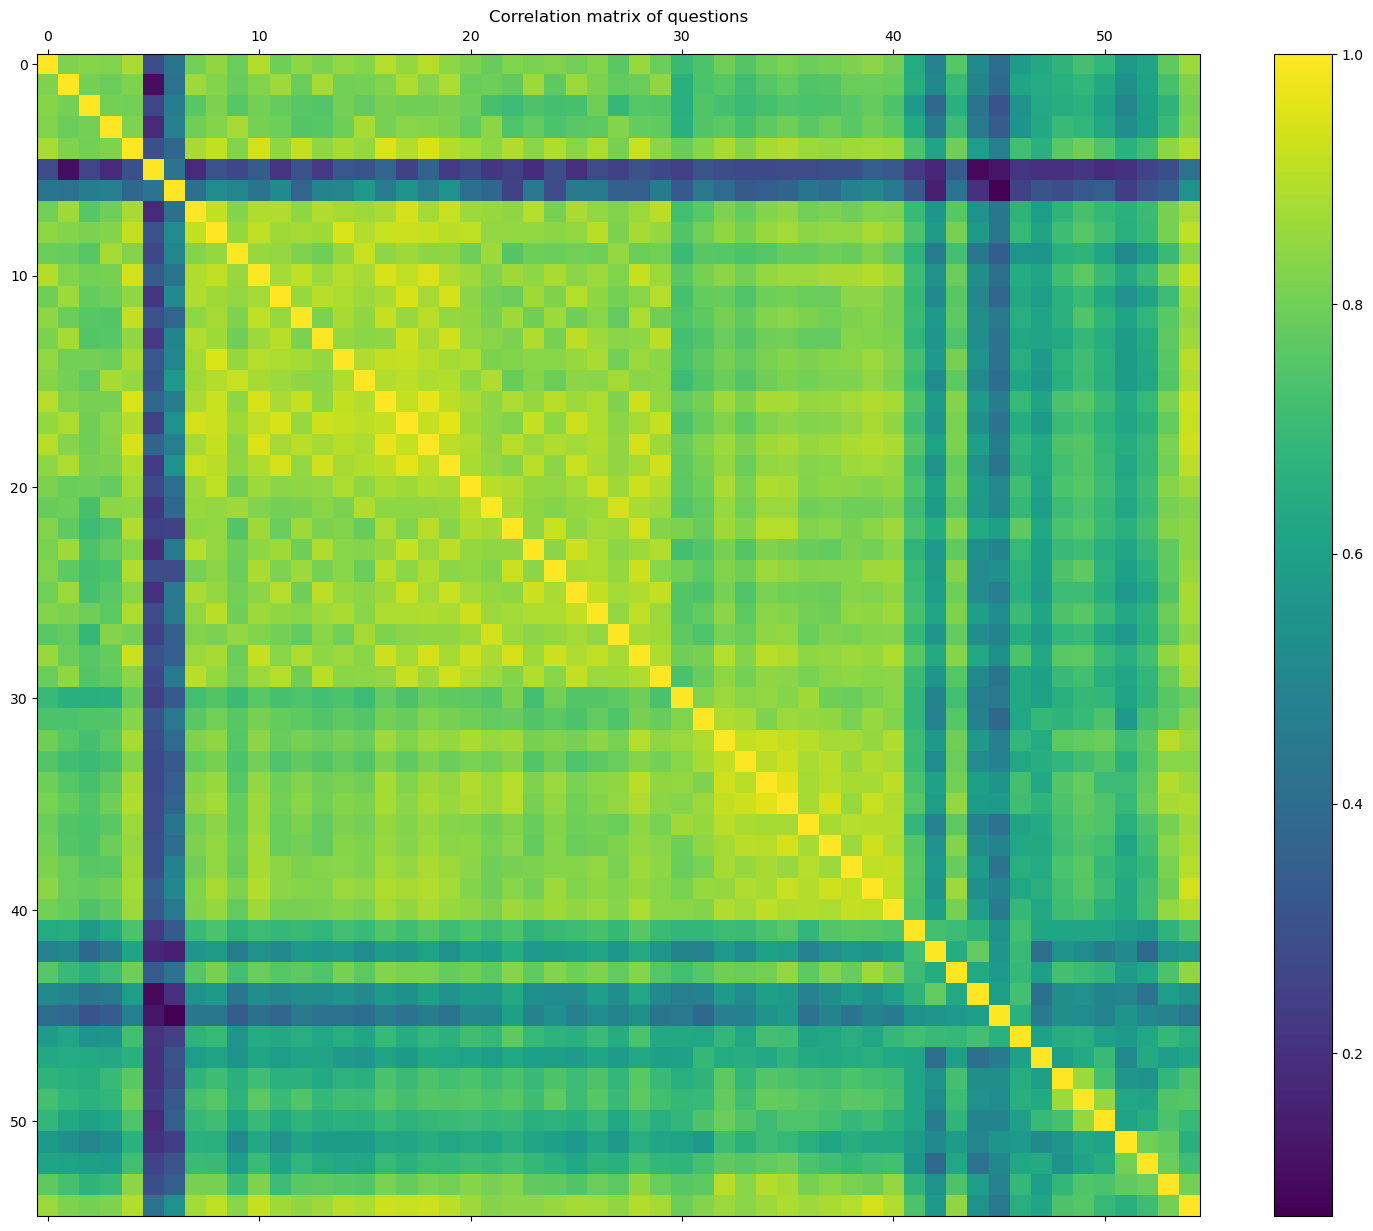

In [18]:
f = plt.figure(figsize=(19,15))
plt.matshow(df.corr(), fignum=f.number)
plt.title('Correlation matrix of questions')
cb = plt.colorbar()
plt.show()

#### I've made two 2x2 grids of boxplots. First one is grid of negative question, that shows trend how ex-partners that went through divorce tend to behave badly in those kind of situations. The second grid consists of positive questions about enjoying time spent together and knowing eachother. The tendencies are pretty suprising. Happily married couples tend to answer that they don't like to spend time together and dont know each other very well; divorced couples answers that they know eachother very well and like to spend time together.

In [19]:
def two_by_two_boxplot(df, x_col, y_cols, questions):
    fig, axs = plt.subplots(2,2,figsize=(12,10))
    for i, ax in enumerate(axs.flat):
        if i < len(y_cols):
            sns.boxplot(x=x_col, y=y_cols[i], data=df, ax=ax)
            ax.set_title(questions[i])
            ax.set_xticks([0, 1])
            ax.set_xticklabels(['Married', 'Divorced'])
            ax.set_ylabel(y_cols[i])
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

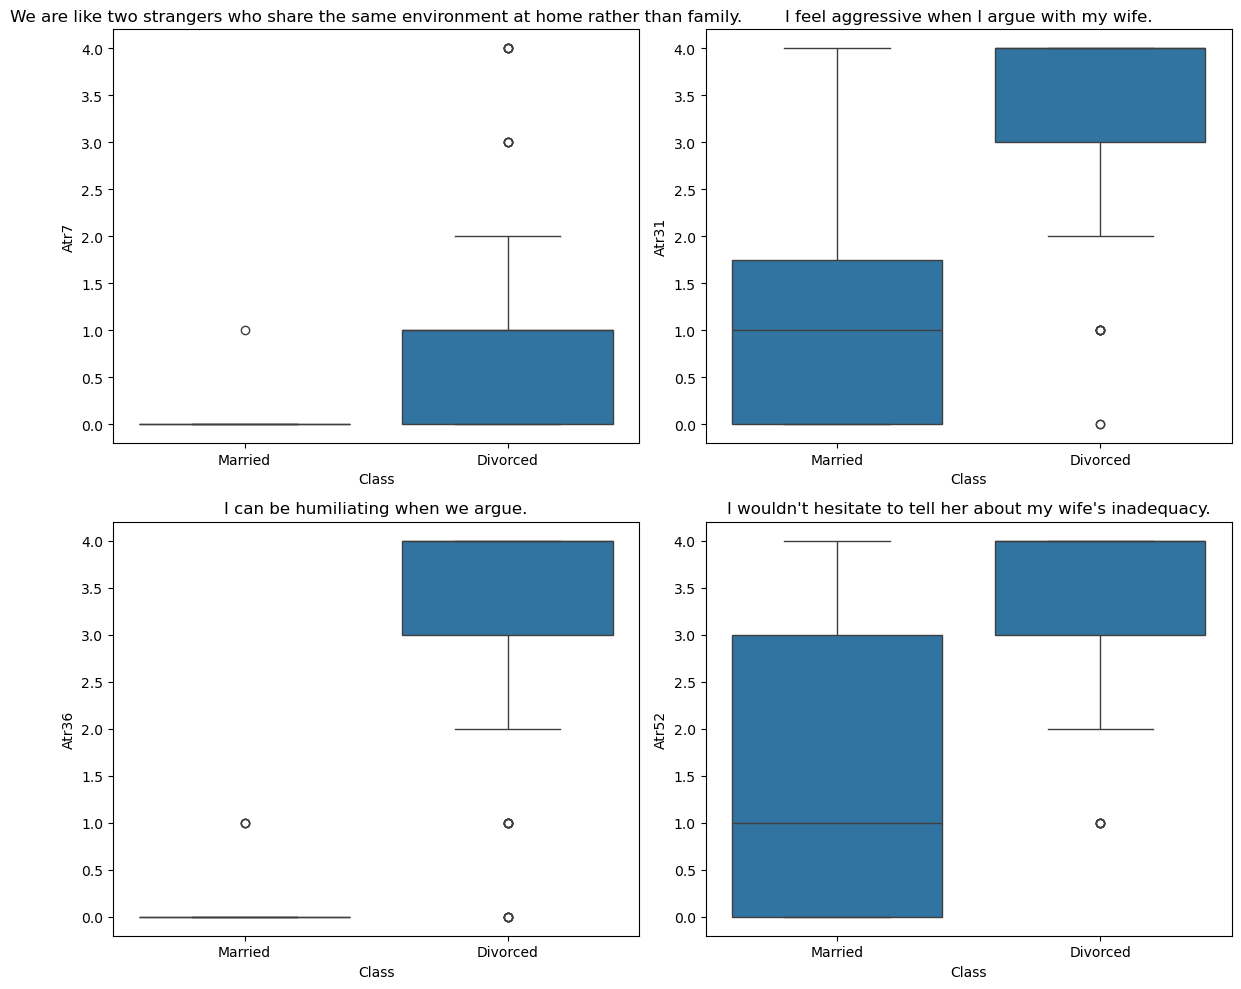

In [20]:
atr = ['Atr7', 'Atr31', 'Atr36', 'Atr52']
questions = ['We are like two strangers who share the same environment at home rather than family.',
            'I feel aggressive when I argue with my wife.',
            'I can be humiliating when we argue.',
            'I wouldn\'t hesitate to tell her about my wife\'s inadequacy.']
two_by_two_boxplot(df, 'Class', atr, questions)

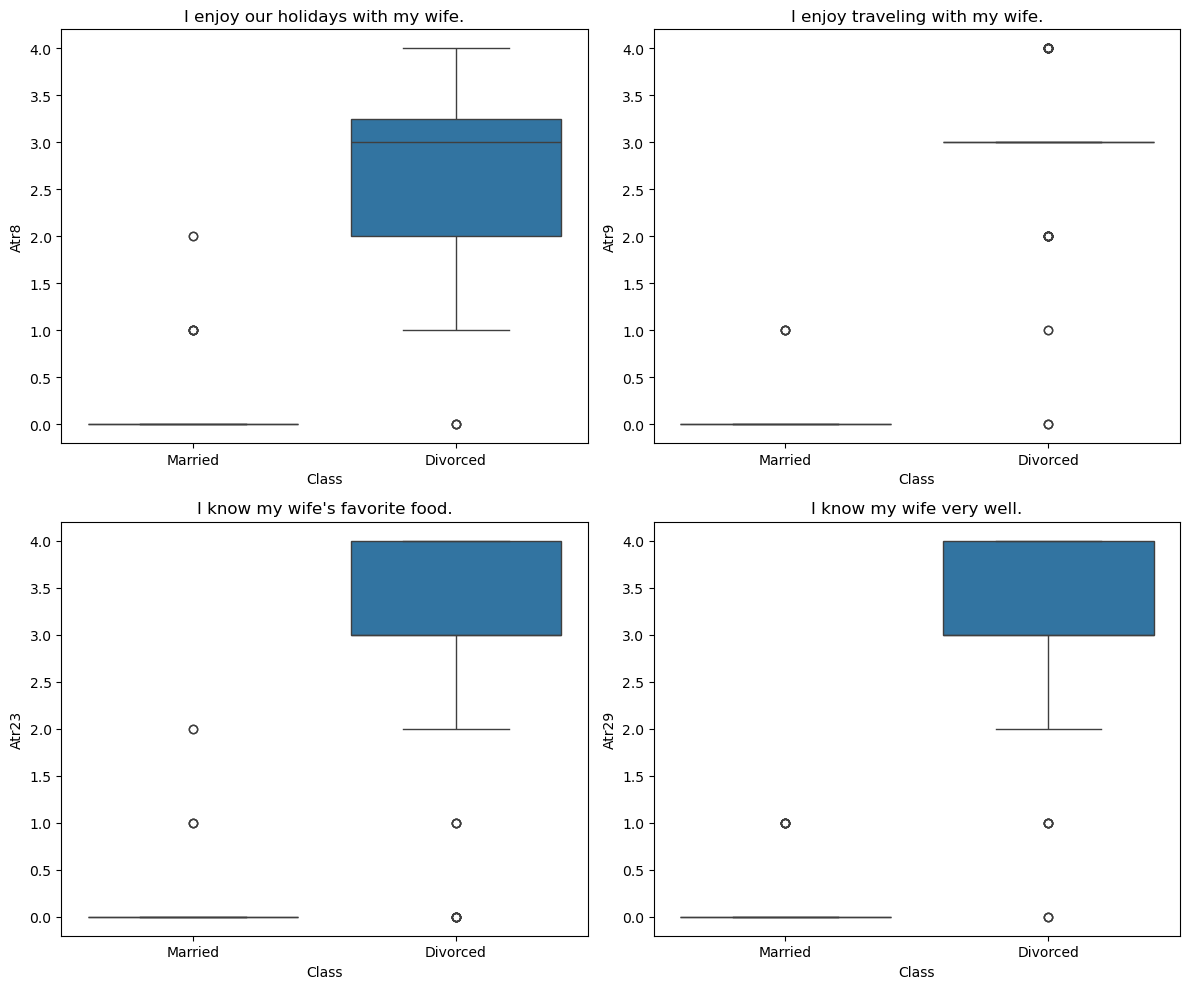

In [21]:
atr = ['Atr8', 'Atr9', 'Atr23', 'Atr29']
questions = ['I enjoy our holidays with my wife.',
            'I enjoy traveling with my wife.',
            'I know my wife\'s favorite food.',
            'I know my wife very well.']

two_by_two_boxplot(df, 'Class', atr, questions)

#### There are few articles on the internet that they've trained models for divorce prediction with this dataset. Below I've used Logistic Regression model to make Receiver Operating Characteristic curve, with AUC(Area under curve) = 1 and TPR = 1, that indicates model is predicting perfectly.

Training Accuracy: % 100.0
Testing Accuracy: % 100.0


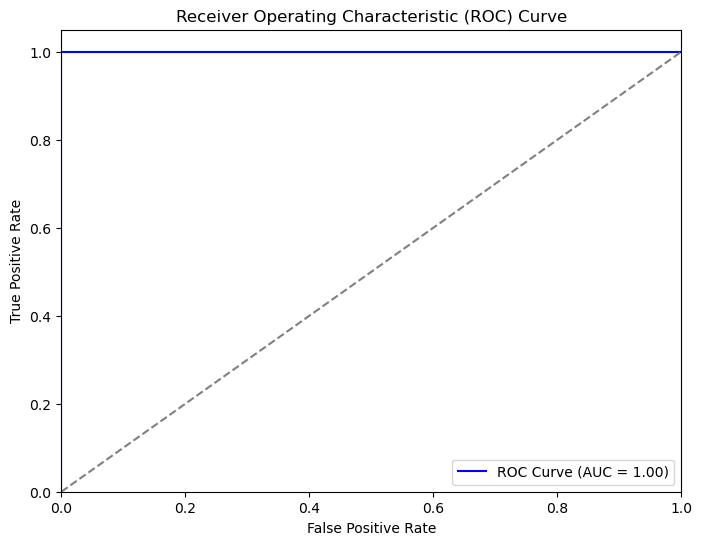

In [58]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

accuracy_train = round(model.score(X_train, y_train) * 100, 2) 
accuracy_test = round(model.score(X_test, y_test) * 100, 2)

print("Training Accuracy: % {}".format(accuracy_train))
print("Testing Accuracy: % {}".format(accuracy_test))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [53]:
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

AUC Score: 1.00


In [57]:
y_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  
print(f"True Positive Rate (TPR): {tpr:.2f}")

True Positive Rate (TPR): 1.00


### To sum up everything, this dataset is pretty interesting to explore. Many answers to questions can amaze person who undertook analysis of this data. Prediction models trained on this dataset can work very good despite it being very small (170 records). I would want to point out that data was obtained in different regions of Turkey. If we would take 1 record from other cultural region, where maybe 'marragies looks different', the prediction model could make bad decision.